In [1]:
from PIL import Image
from itertools import product
import os

# def tile(filename, dir_in, dir_out, d):
#     name, ext = os.path.splitext(filename)
#     img = Image.open(os.path.join(dir_in, filename))
#     w, h = img.size
    
#     grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
#     for i, j in grid:
#         box = (j, i, j+d, i+d)
#         out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
#         img.crop(box).save(out)

# dir_out = "..\data\data_project\\tiles\\solution_14_01"
# os.makedirs(dir_out)
# dir_in = "..\data\data_project\\train_solutions"
# d = 128

# tile("solution_14_01.png", dir_in, dir_out, d)

In [2]:
import random 

def rotateImages(dir):
  angles = [0, 90, 180, 270]
  for image in os.listdir(dir):
    path = os.path.join(dir, image)
    angle = angles[random.randint(0,3)]
    img = Image.open(path)
    img.rotate(angle).save(path)
    img.close()


# for dir in os.listdir("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles"):
#     rotateImages(dir)

In [3]:
def concat_3_row(im1, im2, im3):
    dst = Image.new('RGB', (im1.width*3, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width*2, 0))
    return dst

def concat_4_row(im1, im2, im3, im4):
    dst = Image.new('RGB', (im1.width*4, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width*2, 0))
    dst.paste(im4, (im1.width*3, 0))
    return dst

def concat_3_col(im1, im2, im3):
    dst = Image.new('RGB', (im1.width, im1.height*3))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    dst.paste(im3, (0, im1.height*2))
    return dst

def concat_4_col(im1, im2, im3, im4):
    dst = Image.new('RGB', (im1.width, im1.height*4))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    dst.paste(im3, (0, im1.height*2))
    dst.paste(im4, (0, im1.height*3))
    return dst

In [8]:
for folder in os.listdir("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles"):
    dir = os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles", folder)
    tiles = []
    for image in os.listdir(dir):
        im = Image.open(os.path.join(dir, image))
        tiles.append(im)
    if len(os.listdir(dir)) == 9:
        i = [0,1,2,3,4,5,6,7,8]
        random.shuffle(i)
        row1 = concat_3_row(tiles[i[0]], tiles[i[1]], tiles[i[2]])
        row2 = concat_3_row(tiles[i[3]], tiles[i[4]], tiles[i[5]])
        row3 = concat_3_row(tiles[i[6]], tiles[i[7]], tiles[i[8]])
        new = concat_3_col(row1, row2, row3)
        name = "shuffled" + folder + ".png"
        new.save(os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/shuffled/", name))
    if len(os.listdir(dir)) == 12:
        i = [0,1,2,3,4,5,6,7,8,9,10,11]
        random.shuffle(i)
        row1 = concat_3_row(tiles[i[0]], tiles[i[1]], tiles[i[2]])
        row2 = concat_3_row(tiles[i[3]], tiles[i[4]], tiles[i[5]])
        row3 = concat_3_row(tiles[i[6]], tiles[i[7]], tiles[i[8]])
        row4 = concat_3_row(tiles[i[9]], tiles[i[10]], tiles[i[11]])
        new = concat_4_col(row1, row2, row3, row4)
        name = "shuffled" + folder + ".png"
        new.save(os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/shuffled/", name))
    if len(os.listdir(dir)) == 16:
        i = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        random.shuffle(i)
        row1 = concat_4_row(tiles[i[0]], tiles[i[1]], tiles[i[2]], tiles[i[12]])
        row2 = concat_4_row(tiles[i[3]], tiles[i[4]], tiles[i[5]], tiles[i[13]])
        row3 = concat_4_row(tiles[i[6]], tiles[i[7]], tiles[i[8]], tiles[i[14]])
        row4 = concat_4_row(tiles[i[9]], tiles[i[10]], tiles[i[11]], tiles[i[15]])
        new = concat_4_col(row1, row2, row3, row4)
        name = "shuffled" + folder + ".png"
        new.save(os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/shuffled/", name))


In [48]:
import numpy as np
import cv2

dir = "C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles/solution_12_02"
tiles = []
for image in os.listdir(dir):
        im = cv2.imread(os.path.join(dir, image))
        tiles.append(cv2.Canny(im,10,245))


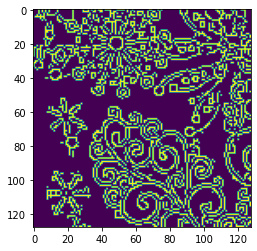

In [49]:
import numpy as np
import matplotlib.pyplot as plt

edges = np.zeros((len(tiles), 4, 128))


for i in range(len(tiles)):
    image = tiles[i]
    imageArray = image
    edges[i,0,:] = imageArray[0,:]
    edges[i,1,:] = imageArray[127,:]
    edges[i,2,:] = imageArray[:,0]
    edges[i,3,:] = imageArray[:,127]

plt.imshow(tiles[0])


In [69]:
minL1s = np.zeros((len(tiles)*4)) 
minTiles = np.zeros((len(tiles)*4))
minEdges = np.zeros((len(tiles)*4))

for i in range(len(tiles)):
    js = list(range(len(tiles)))
    js.remove(i)
    for a in range(4):
        minL1 = np.inf
        edge = edges[i,a,:]
        for j in js:
            for b in range(4):
                L1 = np.sum(np.abs(edges[j,b,:]-edge))
                if L1 < minL1:
                    minL1 = L1
                    minEdgeL1 = b
                    minTileL1 = j
        minL1s[i*4 + a] = minL1
        minTiles[i*4 + a] = minTileL1
        minEdges[i*4 + a] = minEdgeL1
                


In [70]:
# remove highest 12 values as the borders
borders = 12
for i in range(borders):
    ind = np.argmax(minL1s)
    minL1s = np.delete(minL1s, ind)
    minTiles = np.delete(minTiles, ind)
    minEdges = np.delete(minEdges, ind)

In [71]:
print(minTiles)

[3. 7. 0. 3. 0. 0. 5. 0. 5. 0. 8. 0. 2. 8. 8. 0. 4. 0. 8. 0. 0. 7. 7. 7.]


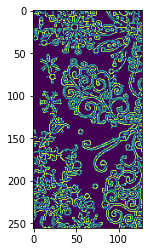

In [57]:
im1 = tiles[0]
im2 = (tiles[minTileL1])
# minEdge = optimal[1]
# if minEdgeL1 == 0:
#     im2.rotate(270)
# if minEdgeL1 == 1:
#     im2.rotate(90)
# if minEdgeL1 == 2:
#     im2.rotate(0)
# if minEdgeL1 == 3:
#     im2.rotate(180)
if minEdgeL1 == 1:
    im2 = cv2.rotate(im2,cv2.ROTATE_180)
if minEdgeL1 == 2:
    im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
if minEdgeL1 == 3:
    im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)

solved = cv2.vconcat([im1, im2])
plt.imshow(solved)

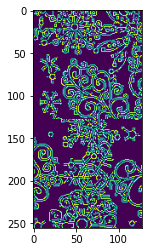

In [55]:
import matplotlib.pyplot as plt

im1 = tiles[0]
im2 = tiles[minTileL2]

# right
# if minEdgeL2 == 0:
#     im2.rotate(270)
# if minEdgeL2 == 1:
#     im2.rotate(90)
# if minEdgeL2 == 2:
#     im2.rotate(0)
# if minEdgeL2 == 3:
#     im2.rotate(180)

#bottom
if minEdgeL2 == 1:
    im2 = cv2.rotate(im2,cv2.ROTATE_180)
if minEdgeL2 == 2:
    im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
if minEdgeL2 == 3:
    im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)

solved = cv2.vconcat([im1, im2])
plt.imshow(solved)